Kieran Fitzmaurice

#### Visualization of the Solar System

(Adapted from textbook exercise 3.5)

The four terrestrial planets of our solar system revolve around the Sun in roughly circular orbits that all lie approximately in the same (ecliptic) plane. Here are some basic parameters:

|Object |Object Radius [km]|Orbit Radius [10$^6$ km]|Period [days]|
|:------|:----------------:|:----------------------:|:-----------:|
|Sun    |695500            |---                     |---          |
|Mercury|2440              |57.9                    |88.0         |
|Venus  |6052              |108.2                   |224.7        |
|Earth  |6371              |149.6                   |365.3        |
|Mars   |3386              |227.9                   |687.0        |

Use `matplotlib` to create an animation of the solar system that shows the following:

- The Sun and planets as circles in their appropriate positions and with sizes proportional to their actual sizes.  Because the radii of the planets are tiny compared to the distances between them, represent the planets by circles with radii $c_1$ times larger than their correct proportionate values, so that you can see them clearly. Find a good value for $c_1$ that makes the planets visible. You'll also need to find a good radius for the Sun. Choose any value that gives a clear visualization. (It doesn't work to scale the radius of the Sun by the same factor you use for the planets, because it'll come out looking much too large. So just use whatever works.) Make each circle a  different color. For instance, Earth could be blue and the Sun could be yellow.
- The motion of the planets as they move around the Sun (by making the spheres of the planets move). In the interests of alleviating boredom, construct your program so that time in your animation runs a factor of $c_2$ faster than actual time. Find a good value of $c_2$ that makes the motion of the orbits easily visible but not unreasonably fast.

In [1]:
#for full credit, your code should create an embedded HTML5 video of your animation
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi

plt.close("all")

class celestial_body:
    """This class holds the planetary radius(km), orbital radius(km),
    and orbital period(days) of a celestial body."""
    
    def __init__(self, r, orb, per, color, t):
        self.r = r
        self.orb = orb
        self.per = per
        self.color = color
        self.t = t
    
    #This allows the coordinates to auto update with time
    
    @property  
    def x(self):
        return self.orb*cos(2*pi*self.t/self.per)
    @property
    def y(self):
        return self.orb*sin(2*pi*self.t/self.per)
    

sun = celestial_body(695500,0,1,"gold",0)
mercury = celestial_body(2440,57.9e6,88,"rosybrown",0)
venus = celestial_body(6052,108.2e6,224.7,"sandybrown",0)
earth = celestial_body(6371,149.6e6,365.3,"deepskyblue",0)
mars = celestial_body(3386,227.9e6,687.0,"orangered",0)

planets = [mercury,venus,earth,mars]

s1 = 2.75e1 #scaling factors for radii of sun and planets, as well as time
c1 = 2e3
c2 = 50

fig, ax = plt.subplots()
ax.set_facecolor("black")

for i,p in enumerate(planets):
    c = plt.Circle((p.x,p.y), radius = c1*p.r, color = p.color) #add planets
    ax.add_patch(c)

plt.axis("scaled")
plt.axis(xmin = -300e6, xmax = 300e6, ymin = -300e6, ymax = 300e6)

numframe = 500
delay_in_ms = c2
    
def animate(frame):
    ax.clear()
    s = plt.Circle((sun.x,sun.y), radius = s1*sun.r, color = sun.color) #add sun
    ax.add_patch(s)
    for p in planets:
        p.t = frame
        c = plt.Circle((p.x,p.y), radius = c1*p.r, color = p.color) #add planets
        ax.add_patch(c)
        

In [2]:
#show your animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#you will likely need to edit and uncomment the next line:
#plt.rcParams["animation.ffmpeg_path"] = r"full/path/to/ffmpeg_binary"

anim = FuncAnimation(fig, animate, frames = numframe, interval = delay_in_ms)
HTML(anim.to_html5_video())

# Calculating Integrals

(Adapted from textbook exercise 4.4)

Suppose we want to calculate the value of the integral
$$I = \int_{-1}^1 \sqrt{1-x^2} \>\mathrm{d}x\,.$$
The integrand looks like a semicircle of radius 1, and hence the value of the integral - the area under the curve - must be $\tfrac12\pi=1.57079632679\ldots$

Alternatively, we can evaluate the integral on the computer by dividing the domain of integration into a large number $N$ of slices of width $h=2/N$ each and then using the Riemann definition of the integral:
$$I = \lim_{N\to\infty} \sum_{k=0}^{N-1} hy_k\,,$$
where
$$y_k = \sqrt{1 - x_k^2}\qquad\mbox{and}\qquad x_k = -1 + hk.$$
We cannot in practice take the limit $N\to\infty$, but we can make a reasonable approximation by just making $N$ large. The figure below shows this approximation with $N=10$.
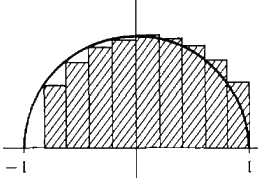

Write a program to evaluate the integral above with $N$ set by a slider from `ipywidgets` with a range from 1 to 100. As the slider updates the value of $N$, your program should update a graph of the integrand and its approximation. To make the bars, you can use `pyplot.bar` (see the `matplotlib` documentation for usage). Your graph should look much like the figure above with one addition: the approximate value of the integral should be shown as a `pyplot.text` label somewhere on the graph.

In [3]:
plt.close("all")
%reset -f

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wgt

slider = wgt.IntSlider(description = "N = ",min=1, max=100, step=1, value=1)

@wgt.interact(N=slider)
def Reimann_Sum(N):
    step = 2/N
    x = np.linspace(-1,1,N+1)
    y = np.sqrt(1-x**2)
    I = sum(y*step)
    
    fig = plt.figure()
    lotsx = np.linspace(-1,1,250)
    lotsy = np.sqrt(1-lotsx**2)
    
    plt.bar(x,y,step,align = "edge")
    plt.plot(lotsx,lotsy,"k-")
    plt.text(-0.95,0.9,("I = %lf" % (I)))
    plt.axis("scaled")
    plt.axis(xmin = -1, xmax = 1, ymin = 0, ymax = 1)
    plt.show()
    
    

# Least-Squares Fitting and the Photoelectric Effect

(Adapted from textbook exercise 3.6)

On CourseWeb you will find a file called `millikan.txt`. The data in the file are taken from a historic experiment by Robert Millikan that measured the *photoelectric effect*. When light of an appropriate wavelength is shone on the surface of a metal, the photons in the light can strike conduction electrons in the metal and, sometimes, eject them from the surface into the free space above. The energy of an ejected electron is equal to the energy of the photon that struck it minus a small amount $\phi$ called the *work function* of the surface, which represents the energy needed to remove an electron from the surface. The energy of a photon is $h\nu$, where $h$ is Planck's constant and $\nu$ is the frequency of the light, and we can measure the energy of an ejected electron by measuring the voltage $V$ that is just sufficient to stop the electron moving. Then the voltage, frequency, and work function are related by the equation
$$V = \frac{h}{e}\nu - \phi\,,$$
where $e$ is the charge on the electron. This equation was first given by Albert Einstein in 1905.

The data in the file `millikan.txt` represent frequencies $\nu$ in hertz (first column) and voltages $V$ in volts (second column) from photoelectric measurements of this kind. Plot the raw data in the file using dots. Calculate and print out the slope $m$ and intercept $c$ of the best-fit line to this data. Plot this line on your graph.

Use this best-fit line, along with the equation given above, to calculate and print from Millikan's experimental data a value for Planck's constant. Compare your value with the accepted value of the constant. You should get a result within a couple of percent of the accepted value.

In [5]:
%reset -f

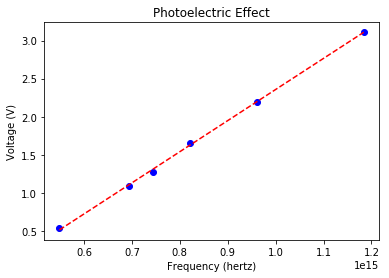

Best fit line:
Slope = 4.088e-15, Intercept = -1.731236
Experimental Value of Planck's Constant: 4.0882e-15 eV s
Literature Value of Planck's Constant: 4.1357e-15 eV s


In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("millikan.txt",dtype = "float")
f = data[:,0]
V = data[:,1]

[m,c] = np.polyfit(f,V,1)

lotsx = np.linspace(min(f),max(f),100)
lotsy = m*lotsx + c

plt.plot(f,V,'bo',lotsx,lotsy,'r--')
plt.xlabel("Frequency (hertz)")
plt.ylabel("Voltage (V)")
plt.title("Photoelectric Effect")
plt.show()

print("Best fit line:\nSlope = %.3e, Intercept = %lf" % (m,c))

h = 4.1357e-15 #Planck's constant in eV*s
print("Experimental Value of Planck's Constant: %.4e eV s" %(m))
print("Literature Value of Planck's Constant: %.4e eV s"%(h))

# Resistance of a 60 W Light Bulb


The resistance R of an object is given by the definition
$$R=\frac{V}{I}\,,$$
where $V$ is applied voltage and $I$ is the resulting current. If an object is *ohmic*, $R$ is constant. As you will soon see, incandescent light bulbs are *not* ohmic. 

On CourseWeb you will find a file called `lightbulb.txt` that contains measurements of the voltage applied (in volts) to a 60 W light bulb and the resulting current (in milliamperes) through the bulb. Using this data, calculate and plot resistance versus voltage, with the values shown as dots. Fit a power law to the resistance and add it to your graph.

Use your power law to predict and the current that would pass through a 60 W light bulb if it were operated at 240 V. Print this prediction.


In [7]:
%reset -f

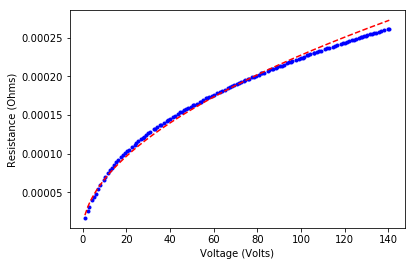

Power Law Fit: A*R^m
 A = 1.964e-05, m = 0.531906

Predicted resistance at voltage of 240 V: 3.624e-04 Ohms


In [8]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt

data = np.genfromtxt("lightbulb.txt",dtype = "float")

V = data[:,0]
I = data[:,1]
I = I*1000

good = np.nonzero(I)
I = I[good]
V = V[good]

R = V/I

LV = np.log(V)
LR = np.log(R)

[m,b] = np.polyfit(LV,LR,1)

plt.plot(V,R,'b.')

plt.plot(V,exp(b)*V**m,'r--')
plt.xlabel("Voltage (Volts)")
plt.ylabel("Resistance (Ohms)")
plt.show()

print("Power Law Fit: A*R^m\n A = %.3e, m = %lf\n" % (exp(b),m))

R_pred = exp(b)*240**m

print("Predicted resistance at voltage of 240 V: %.3e Ohms" %(R_pred))


